<a href="https://colab.research.google.com/github/SLVmain/Neural_Network_start/blob/Les_05/HW_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import numpy as np
import tensorflow.keras as keras
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import concatenate, Input, Dense, Dropout, BatchNormalization, Flatten, Conv1D, Conv2D, LSTM

from google.colab import files
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import os
import datetime

In [2]:
files.upload()
!ls

Saving airline-passengers.csv to airline-passengers (1).csv
'airline-passengers (1).csv'   airline-passengers.csv   sample_data


In [3]:
df = pd.read_csv('/content/airline-passengers.csv')
df.index = df.Month
df.drop(['Month'],axis=1,inplace = True)
df.head()

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [4]:
df.shape

(144, 1)

Данные о пассажиропотоке + индексы (месяц и год)

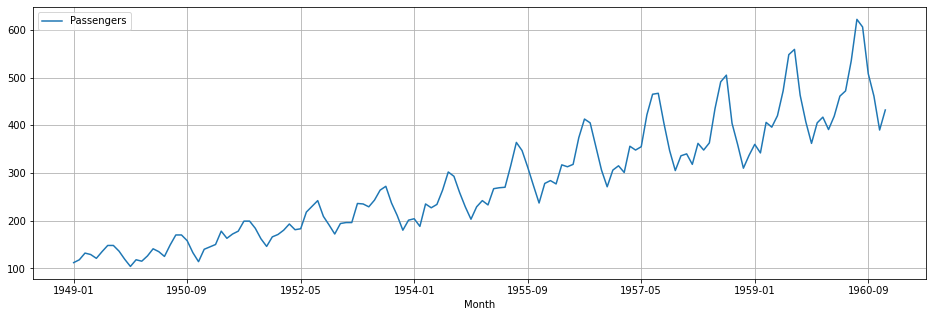

In [5]:
df.plot( figsize = (16,5))

plt.grid('On')
plt.show()

In [6]:
df.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [7]:
# прологарифмируем данные
df['Passengers'] = np.log1p(df['Passengers'])

# back = np.expm1(Y)

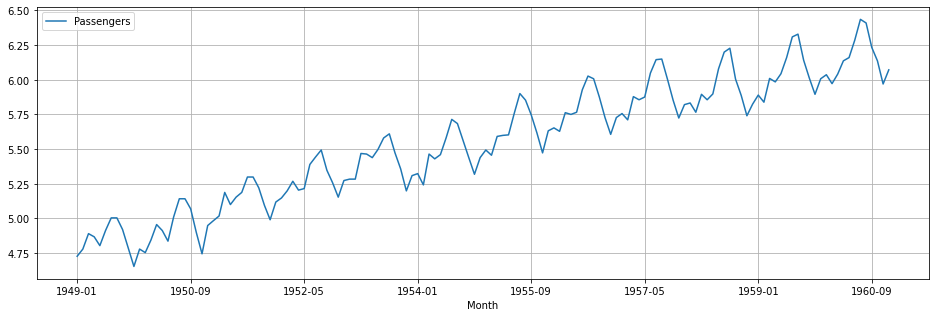

In [8]:
df.plot( figsize = (16,5))

plt.grid('On')
plt.show()

In [9]:
df.describe()

,Passengers
count,144.000000
mean,5.546482
std,0.439571
min,4.653960
25%,5.198497
50%,5.585358
75%,5.890259
max,6.434547


In [10]:
data = df.copy().reset_index() # берем все что есть

In [11]:
data.shape

(144, 2)

In [12]:
data.head()

,Month,Passengers
0,1949-01,4.727388
1,1949-02,4.779123
2,1949-03,4.890349
3,1949-04,4.867534
4,1949-05,4.804021


In [178]:
#не используем, тк логарифмируем
#def normalize(data, train_split):
    #data_mean = data[:train_split].mean(axis=0)
    #data_std = data[:train_split].std(axis=0)
    #return (data - data_mean) / data_std

Создаем данные для обучения

In [13]:
data_f = data.copy()


channelIndexes = [1]
train_split = int(df.shape[0] * 0.8)

# отступ тестов от тренировок
bias = 1


# делим
train_data = data_f.iloc[0 : train_split ,channelIndexes]
test_data = data_f.iloc[train_split+bias:,channelIndexes]

print(train_data.shape)

print(test_data.shape)

(115, 1)
(28, 1)


In [14]:
train_data.head(7)

,Passengers
0,4.727388
1,4.779123
2,4.890349
3,4.867534
4,4.804021
5,4.912655
6,5.003946


In [15]:
train_data.tail()

,Passengers
110,5.894403
111,5.855072
112,5.897154
113,6.077642
114,6.198479


In [16]:
def create_timeseries_slices(data, step_back=5):
  data = np.array(data)
  X = []
  Y = []
  for i in range(len(data) - step_back):
    stop = i + step_back
    ts_slice = data[i:stop]
    y = data[i + step_back]
    X.append(ts_slice.flatten())
    Y.append(y)

  return np.array(X),np.array(Y).flatten()

In [17]:
step_back = 5
X_train, y_train = create_timeseries_slices(train_data, step_back)
X_test, y_test = create_timeseries_slices(test_data, step_back)

In [18]:
# проверка
X_train[:10], y_train[:10]

(array([[4.72738782, 4.77912349, 4.89034913, 4.86753445, 4.80402104],
        [4.77912349, 4.89034913, 4.86753445, 4.80402104, 4.91265489],
        [4.89034913, 4.86753445, 4.80402104, 4.91265489, 5.00394631],
        [4.86753445, 4.80402104, 4.91265489, 5.00394631, 5.00394631],
        [4.80402104, 4.91265489, 5.00394631, 5.00394631, 4.91998093],
        [4.91265489, 5.00394631, 5.00394631, 4.91998093, 4.78749174],
        [5.00394631, 5.00394631, 4.91998093, 4.78749174, 4.65396035],
        [5.00394631, 4.91998093, 4.78749174, 4.65396035, 4.77912349],
        [4.91998093, 4.78749174, 4.65396035, 4.77912349, 4.75359019],
        [4.78749174, 4.65396035, 4.77912349, 4.75359019, 4.84418709]]),
 array([4.91265489, 5.00394631, 5.00394631, 4.91998093, 4.78749174,
        4.65396035, 4.77912349, 4.75359019, 4.84418709, 4.95582706]))

In [19]:
X_train.shape

(110, 5)

In [20]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

****

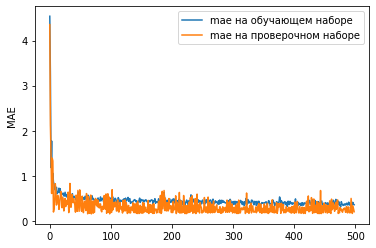

In [21]:
# LSTM слои+Conv1D +Dense слой
learning_rate = 0.001
batch_size = 1
epochs = 500


model = Sequential()

model.add(LSTM(64, return_sequences="True", recurrent_dropout=0.3))
model.add(LSTM(64, return_sequences="True")) 
#model.add(BatchNormalization())
model.add(Conv1D(64, 3, activation="relu")) 
model.add(Conv1D(64, 1, activation="relu"))
model.add(Dropout(0.4))
model.add(Flatten())                          
model.add(Dense(3, activation="relu"))
#model.add(Dropout(0.4)) 

model.add(Dense(1, activation="linear"))

model.compile(loss="mae", optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), metrics=['mae'])

history = model.fit(
    X_train, y_train,
    epochs=epochs,
    validation_data=(X_test, y_test), verbose=0
    )


plt.plot(history.history['mae'][1:], 
         label='mae на обучающем наборе')
plt.plot(history.history['val_mae'][1:], 
         label='mae на проверочном наборе')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [22]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 20ms/step - loss: 0.1998 - mae: 0.1998


[0.19980975985527039, 0.19980975985527039]

In [23]:
predVal = model.predict(X_test).flatten()

In [24]:
def back_from_log(y):
  return np.expm1(y)

In [25]:
n = 10
print(f'X {back_from_log(X_test[n])}')
print(f'предсказание {back_from_log(predVal[n])}')
print(f'реальный у {back_from_log(y_test[n])}')

X [[548.]
 [559.]
 [463.]
 [407.]
 [362.]]
предсказание 434.6598815917969
реальный у 404.99999999999994


In [26]:
y_test1 = y_test.flatten()

In [27]:
df_error = pd.DataFrame(back_from_log(predVal), back_from_log(y_test1)).reset_index()
df_error

,index,0
0,342.0,336.310516
1,406.0,322.714966
2,396.0,322.095337
3,420.0,334.957977
4,472.0,346.625153
5,548.0,357.613800
6,559.0,379.283142
7,463.0,395.346313
8,407.0,420.451599
9,362.0,438.942993


In [28]:
#средняя абсолютная ошибка
mae_ = ((abs(back_from_log(y_test1) - back_from_log(predVal))).sum()/len(y_test1))
mae_

86.9961136527683

In [41]:
model2 = Sequential()
model2.add(LSTM(64, recurrent_dropout=0.3))
model2.add(Dense(1))

model2.compile(loss='mae', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001) , metrics=['mae'])

model2.fit(X_train, y_train, epochs=200, batch_size=1, verbose=0)


model2.evaluate(X_test, y_test)

1/1 [==============================] - 0s 330ms/step - loss: 0.1886 - mae: 0.1886


[0.18860535323619843, 0.18860535323619843]

In [42]:
predVal2 = model2.predict(X_test).flatten()
mae_2 = ((abs(back_from_log(y_test1) - back_from_log(predVal2))).sum()/len(y_test1))
mae_2

81.37598054305363

упростим модель, уменьшим количество ядер

In [38]:
model1 = Sequential()
model1.add(LSTM(4, recurrent_dropout=0.3))
model1.add(Dense(1))

model1.compile(loss='mae', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001) , metrics=['mae'])

model1.fit(X_train, y_train, epochs=200, batch_size=1, verbose=0)


model1.evaluate(X_test, y_test)

1/1 [==============================] - 0s 338ms/step - loss: 0.1078 - mae: 0.1078


[0.1077781543135643, 0.1077781543135643]

In [40]:
predVal1 = model1.predict(X_test).flatten()
mae_1 = ((abs(back_from_log(y_test1) - back_from_log(predVal1))).sum()/len(y_test1))
mae_1

49.91849020253053

лучше результаты получились у самой простой модели (уменьшала количество слоев и ядер). Сравним с линейной регрессией

In [43]:
# постоим самую простую модель линейной регрессии
from sklearn.linear_model import LinearRegression;



step_back = 5
X_trainr, y_trainr = create_timeseries_slices(train_data, step_back)
X_testr, y_testr = create_timeseries_slices(test_data, step_back)

reg=LinearRegression()
reg.fit(X_trainr, y_trainr);

In [35]:
regr_pred = reg.predict(X_testr)

In [36]:
df_errorr = pd.DataFrame(back_from_log(regr_pred), back_from_log(y_test1)).reset_index()
df_errorr

,index,0
0,342.0,372.496660
1,406.0,353.574582
2,396.0,414.216939
3,420.0,371.699722
4,472.0,437.180531
5,548.0,448.872531
6,559.0,552.365682
7,463.0,531.400503
8,407.0,429.031355
9,362.0,394.517075


In [37]:
#средняя абсолютная ошибка в пассажирах
mae_r = ((abs(back_from_log(y_test1) - back_from_log(regr_pred))).sum()/len(y_test1))
mae_r

41.05132052720629

Простая линейная регрессия показала лучшие результаты